In [3]:
%%time
print('Hello')

Hello
Wall time: 1 ms


In [2]:
%%time
def func(num):
    total = 2
    for i in range(1,num):
        total=total**i
    return total

print(func(11))

4449031236862269356385086553204922921493702169103355580845287791257989053988736336972657873859428877570493372375417745069625983820827257270903455545438655894626772433680833310843158613139891996119376576285575808922254853828415418504535276352198409484750546942872749476275389150981228700312657577798271962725665117703249450349776124500398380901863722523605480593754286864356938433499931054154332028428574972768172266160769826928448293823784413813621311075375559091226226028332480702904904963545606495413928174824232473798937390415042179636334426552400595435471894250513248651229979382706364211836409097547415684346031565741476178263317250810425535313596243822678207873140045949495682953193185319818875632930862344105613096502703482281454424927272947091498183540822682309090581782301451037963221345087003319258859597536205914314950703116731103284706766479851784867576051451778181279781569837646220769061985639165622967515465058298410195936930030329282563434893190994154236546044883189163609158612532379

In [4]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:57893 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 16.86 GB


In [5]:
import dask
result = dask.delayed(func)(11)

In [ ]:
result.compute()

In [1]:
from dask.distributed import Client, progress
c = Client()
c

C:\Users\Santhosh\Anaconda3\lib\site-packages\distributed\bokeh\core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:53399 Dashboard: http://127.0.0.1:53402/status,Cluster Workers: 12 Cores: 12 Memory: 34.08 GB


In [3]:
import dask.array as da
x = da.random.random(size=(10000,10000), chunks=(1000,1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000)>

In [4]:
x.numblocks

(10, 10)

In [5]:
x = x.persist()
progress(x)

VBox()

In [6]:
x.sum().compute()

50001673.01125302

In [7]:
x.mean(axis=0).compute()

array([0.50041487, 0.49803604, 0.501574  , ..., 0.50375967, 0.49987359,
       0.50408095])

In [9]:
x[x<0]=0
x[x>x.mean(axis=0)]=1
y = x + x.T
y.std(axis=1).compute()

array([0.55063594, 0.55151923, 0.5514411 , ..., 0.55197958, 0.54975869,
       0.54739632])

In [ ]:
from gcsfs import GCSFileSystem
gcs = GCSFileSystem(token='cloud')

gcs.ls('anaconda-public-data/nyc-taxi/csv/2015/')

In [29]:
import pandas as pd

with open('yellow_tripdata_2015-01-06.csv') as f:
    df = pd.read_csv(f, nrows=5, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,2,2015-01-08 22:44:09,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,1,N,-73.973763,40.743378,2,7.5,0.5,0.5,0,0,8.8
1,1,2015-01-08 22:44:09,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,1,N,-74.004105,40.721081,2,7.0,0.5,0.5,0,0,8.3
2,1,2015-01-08 22:44:10,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,1,N,-73.952354,40.798199,2,10.5,0.5,0.5,0,0,11.8
3,1,2015-01-08 22:44:10,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,1,N,-73.919571,40.832001,2,21.5,0.5,0.5,0,0,22.8
4,1,2015-01-08 22:44:12,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,1,N,-73.984390,40.764053,2,3.5,0.5,0.5,0,0,4.8


In [13]:
import dask
from dask.distributed import Client, progress
client = Client()
client

C:\Users\Santhosh\Anaconda3\lib\site-packages\distributed\bokeh\core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:54156 Dashboard: http://127.0.0.1:54159/status,Cluster Workers: 12 Cores: 12 Memory: 34.08 GB


In [14]:
import dask.dataframe as dd

df = dd.read_csv('yellow_tripdata_2015-01-06.csv', 
                 parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [15]:
df = df.persist()
progress(df)

VBox()

In [16]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
npartitions=184,,,,,,,,,,,,,,,,,,
,int64,datetime64[ns],datetime64[ns],int64,float64,float64,float64,int64,object,float64,float64,int64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [30]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                        int64
tolls_amount                      int64
total_amount                    float64
dtype: object

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
0,2,2015-01-08 22:44:09,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,1,N,-73.973763,40.743378,2,7.5,0.5,0.5,0,0,8.8
1,1,2015-01-08 22:44:09,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,1,N,-74.004105,40.721081,2,7.0,0.5,0.5,0,0,8.3
2,1,2015-01-08 22:44:10,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,1,N,-73.952354,40.798199,2,10.5,0.5,0.5,0,0,11.8
3,1,2015-01-08 22:44:10,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,1,N,-73.919571,40.832001,2,21.5,0.5,0.5,0,0,22.8
4,1,2015-01-08 22:44:12,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,1,N,-73.984390,40.764053,2,3.5,0.5,0.5,0,0,4.8


In [32]:
%time len(df)

Wall time: 0 ns


5

In [33]:
%time df.passenger_count.sum()

Wall time: 0 ns


7

In [34]:
%time df.passenger_count.sum().compute()

AttributeError: 'numpy.int64' object has no attribute 'compute'

In [22]:
# Compute average trip distance grouped by passenger count
df.groupby(df.passenger_count).trip_distance.mean().compute()

passenger_count
0     2.313313
1    19.017508
2    17.851579
3     0.120515
4    11.545251
5     3.013812
6     2.922961
7     4.224845
9     5.302687
8     3.842568
Name: trip_distance, dtype: float64

In [23]:
df2 = df[(df.tip_amount > 0) & (df.fare_amount > 0)]
df2['tip_fraction'] = df2.tip_amount / df2.fare_amount

In [24]:
# Group df.tpep_pickup_datetime by dayofweek and hour
dayofweek = df2.groupby(df2.tpep_pickup_datetime.dt.dayofweek).tip_fraction.mean() 
hour = df2.groupby(df2.tpep_pickup_datetime.dt.hour).tip_fraction.mean()

dayofweek, hour = dask.persist(dayofweek, hour)
progress(dayofweek, hour)

VBox()

In [25]:
%matplotlib inline

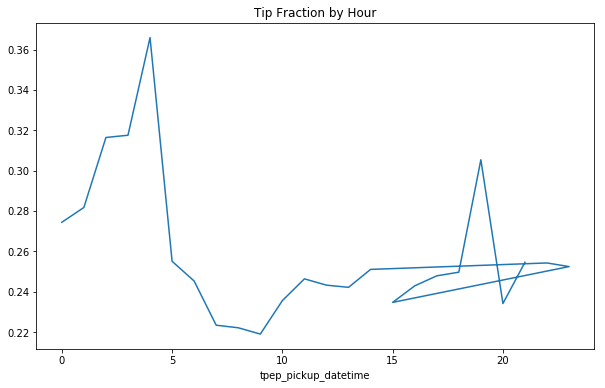

In [26]:
hour.compute().plot(figsize=(10, 6), title='Tip Fraction by Hour')

In [28]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

fig = figure(title='Tip Fraction',
            x_axis_label = 'Hour',
            y_axis_label='Tip',
            height=300)
fig.line(x=hour.index.compute(),y=hour.compute(),line_width=3)
fig.y_range.start=0
show(fig)

Loading BokehJS ...

In [1]:
from dask.distributed import Client
client = Client()
client

C:\Users\Santhosh\Anaconda3\lib\site-packages\distributed\bokeh\core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:59613 Dashboard: http://127.0.0.1:59616/status,Cluster Workers: 12 Cores: 12 Memory: 34.08 GB


In [2]:
from time import sleep

def inc(x):
    from random import random
    sleep(random())
    return x + 1

def dec(x):
    from random import random
    sleep(random())
    return x - 1
    
def add(x, y):
    from random import random
    sleep(random())
    return x + y

In [3]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

Wall time: 995 ms


In [4]:
import dask
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [5]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

Wall time: 950 µs


In [6]:
z

Delayed('add-26592db5-3c90-4fe6-8a73-eb57a972579b')

In [7]:
z.compute()

3

In [8]:
%%time
zs = []
for i in range(256):
    x = inc(i)
    y = dec(x)
    z = add(x, y)
    zs.append(z)
    
zs = dask.persist(*zs)
total = dask.delayed(sum)(zs)

Wall time: 113 ms


In [56]:
total.compute()

65536

In [13]:
L = zs
while len(L) > 1:
    new_L = []
    for i in range(0, len(L), 2):
        lazy = add(L[i], L[i + 1])  # add neighbors
        new_L.append(lazy)
    L = new_L                       # swap old list for new

In [14]:
dask.compute(L)

([65536],)